# Southern Water Corp Case Study

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
from math import ceil
from scipy.stats import shapiro
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 

In [2]:
# Read in csv files
df_raw = pd.read_csv(r"C:\Users\User\Jupyter Projects\swc_python_case_study\DF_Raw_Data.csv")
df_std = pd.read_csv(r"C:\Users\User\Jupyter Projects\swc_python_case_study\DF_Rolling_Stdev.csv")

In [3]:
df_raw.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,41.802629,41.796702,90.796576,202.851610,50.226661,3.540897,76.015149,0.021199
std,3.656576,3.654873,10.217885,22.683977,5.298203,0.579055,6.651633,0.144075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.050000,41.000000,85.000000,191.000000,48.000000,3.220000,74.560000,0.000000
50%,42.100000,42.140000,91.000000,203.000000,51.000000,3.480000,76.620000,0.000000
75%,43.140000,43.130000,97.000000,215.000000,53.000000,3.780000,78.470000,0.000000
max,45.900000,45.840000,124.000000,264.000000,65.000000,7.560000,83.450000,1.000000


In [4]:
df_std.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.00000,2452.000000,2452.000000
mean,1.485126,1.497361,6.648308,13.945338,3.436370,0.37060,2.725232,0.021207
std,2.294950,2.282053,5.722897,12.394302,3.043042,0.29979,4.186723,0.144104
min,0.380000,0.640000,0.580000,5.000000,0.900000,0.11000,1.170000,0.000000
25%,1.070000,1.080000,5.520000,11.210000,2.920000,0.28000,1.960000,0.000000
50%,1.160000,1.170000,5.990000,12.180000,3.160000,0.32000,2.120000,0.000000
75%,1.230000,1.260000,6.460000,13.110000,3.370000,0.36000,2.270000,0.000000
max,21.390000,21.530000,59.310000,124.710000,30.650000,3.32000,39.150000,1.000000


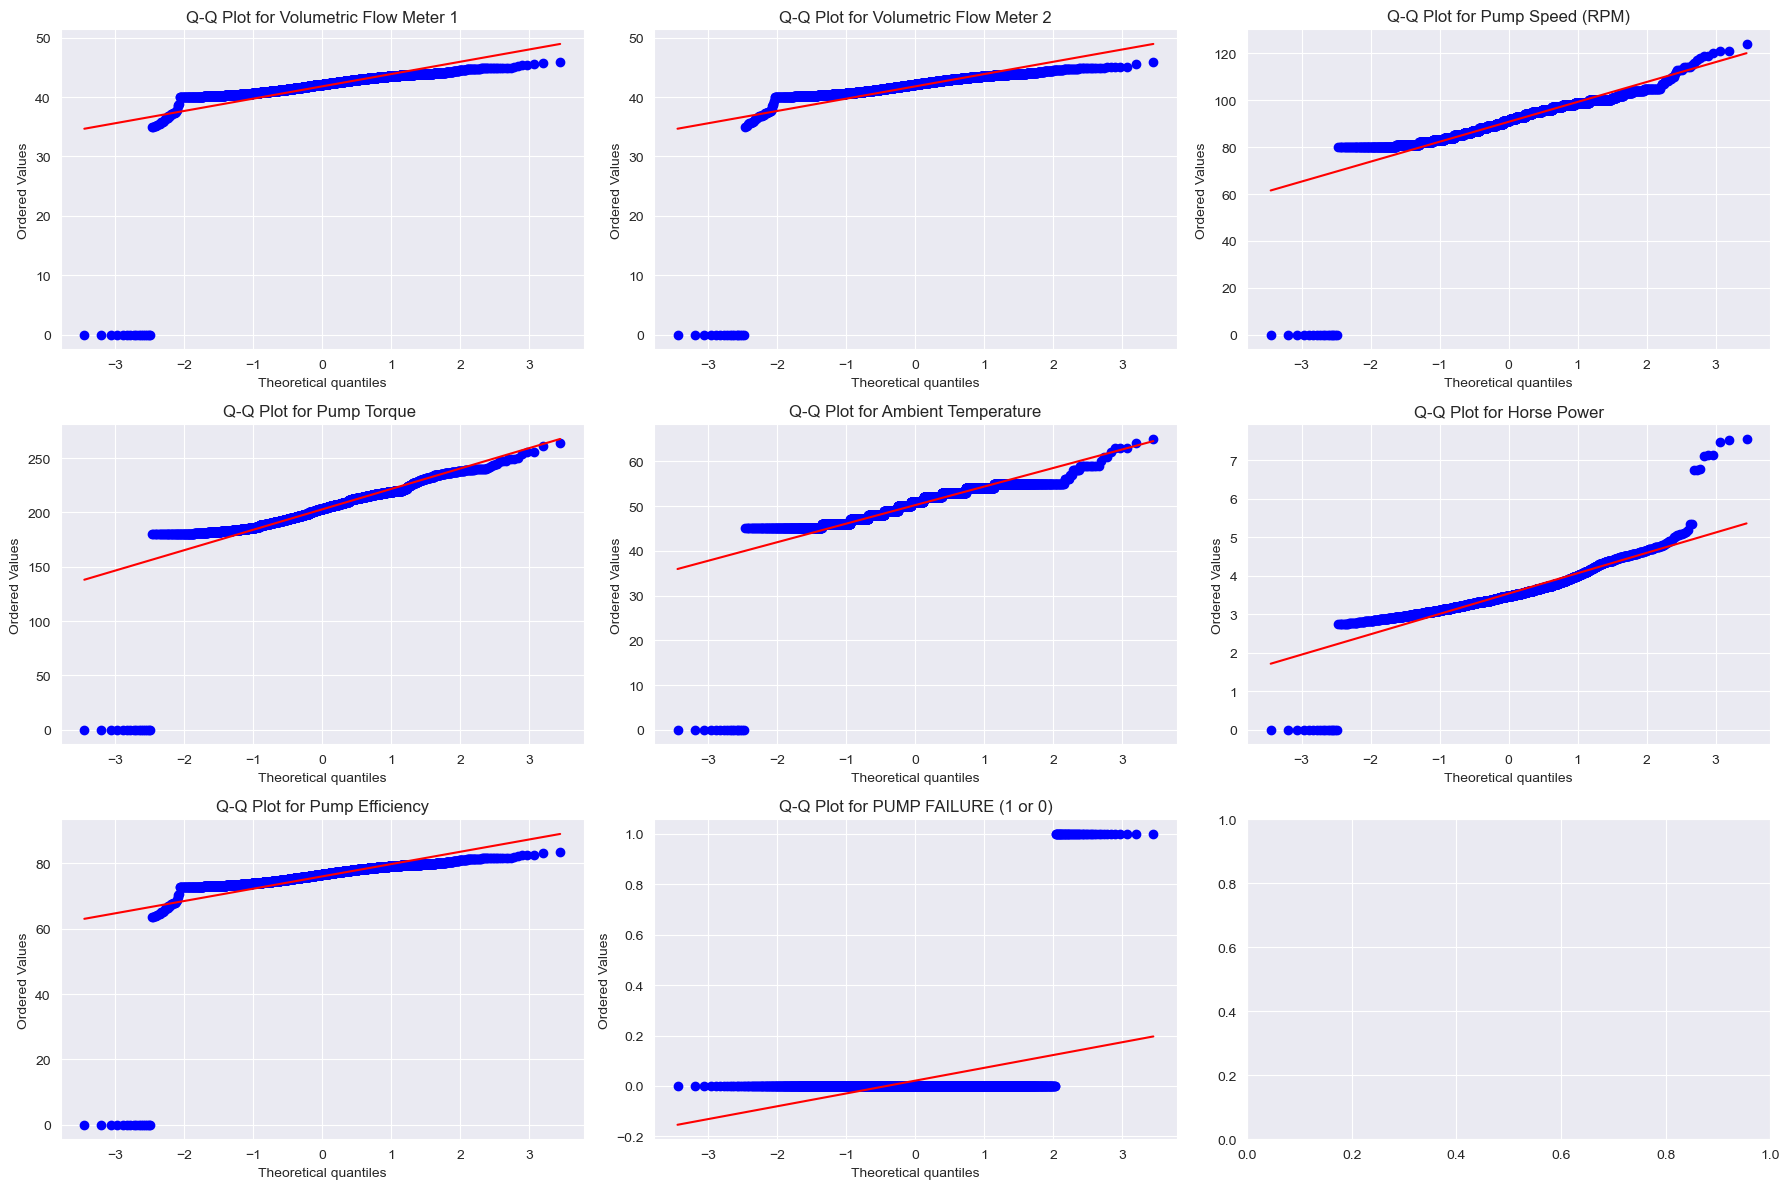

In [5]:
columns = df_raw.select_dtypes(include=['float64', 'int64']).columns

n = len(columns)
n_cols = 3
n_rows = int(ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))  # Assuming 6x4 size for each subplot

for i, col in enumerate(columns):
    row, col_idx = divmod(i, n_cols)
    stats.probplot(df_raw[col], plot=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Q-Q Plot for {col}')

plt.tight_layout()
plt.show()

In [8]:
# Check for Gaussian distribution qualities for each attribute
for col in columns:
    _, p_value = shapiro(df_raw[col])
    if p_value > 0.05:
        print(f"{col} looks like Gaussian (fail to reject H0)")
    else:
        print(f"{col} does not look like Gaussian (reject H0)")

Volumetric Flow Meter 1 does not look like Gaussian (reject H0)
Volumetric Flow Meter 2 does not look like Gaussian (reject H0)
Pump Speed (RPM) does not look like Gaussian (reject H0)
Pump Torque  does not look like Gaussian (reject H0)
Ambient Temperature does not look like Gaussian (reject H0)
Horse Power does not look like Gaussian (reject H0)
Pump Efficiency does not look like Gaussian (reject H0)
PUMP FAILURE (1 or 0) does not look like Gaussian (reject H0)


#### While the raw dataset has a number of metrics showing the std dev at about 10% of the mean value, horsepower actually shows the most variability relative to the mean value at 16% of the mean value. 
#### Interestingly enough, the variability in the std dev dataset is much higher, with std dev values relatively similar to the mean values.

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

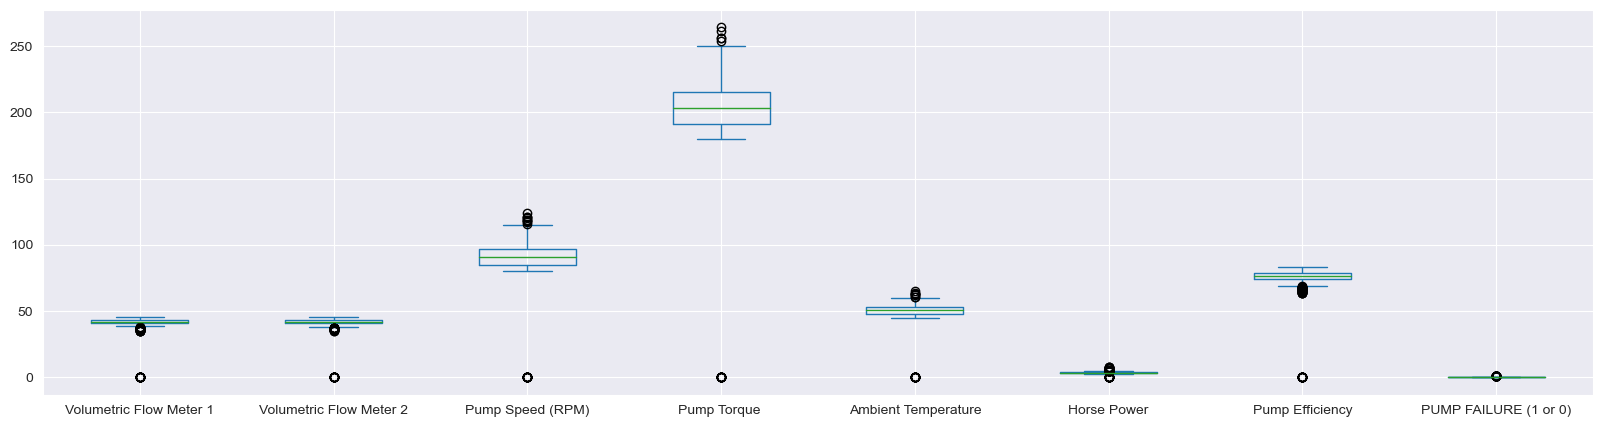

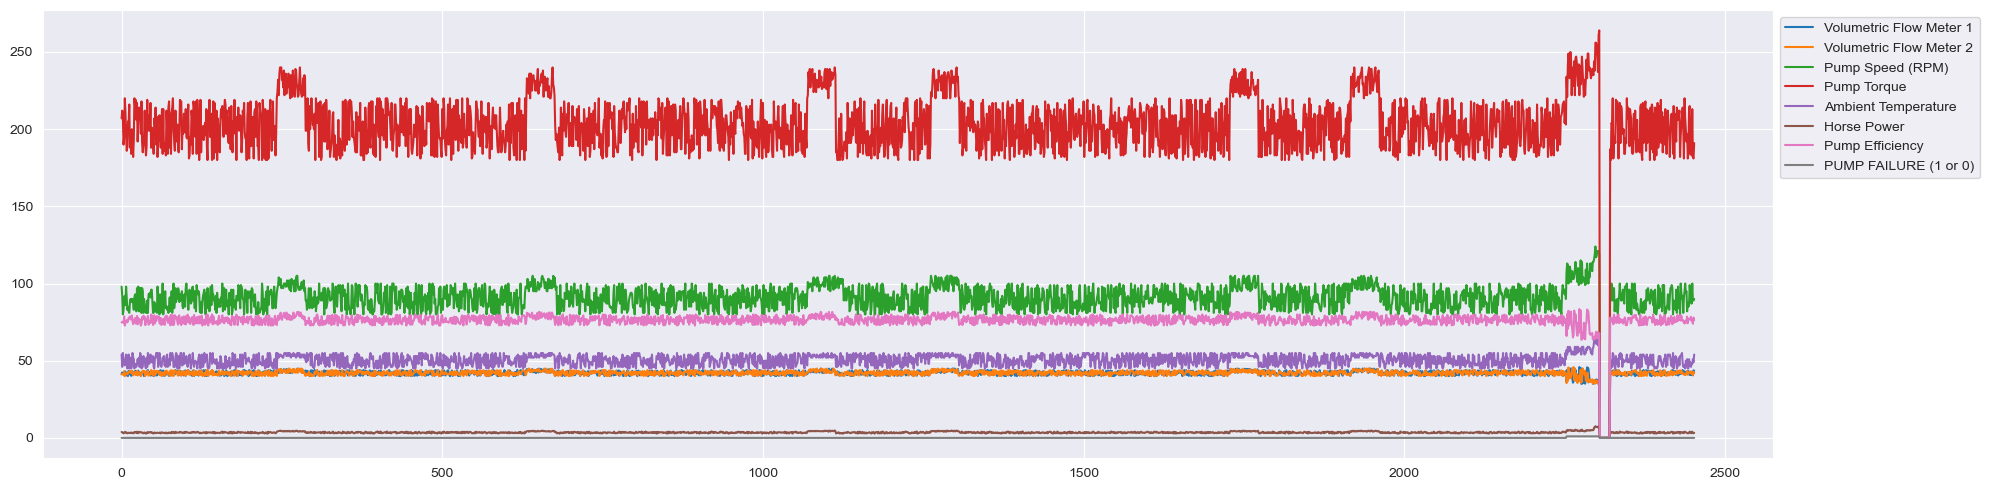

In [9]:
# Plot the raw data metrics represeted in a box plot to capture outliers

# Create boxplot
df_raw.plot(kind='box')

# Show line plot 
df_raw.plot(kind='line')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

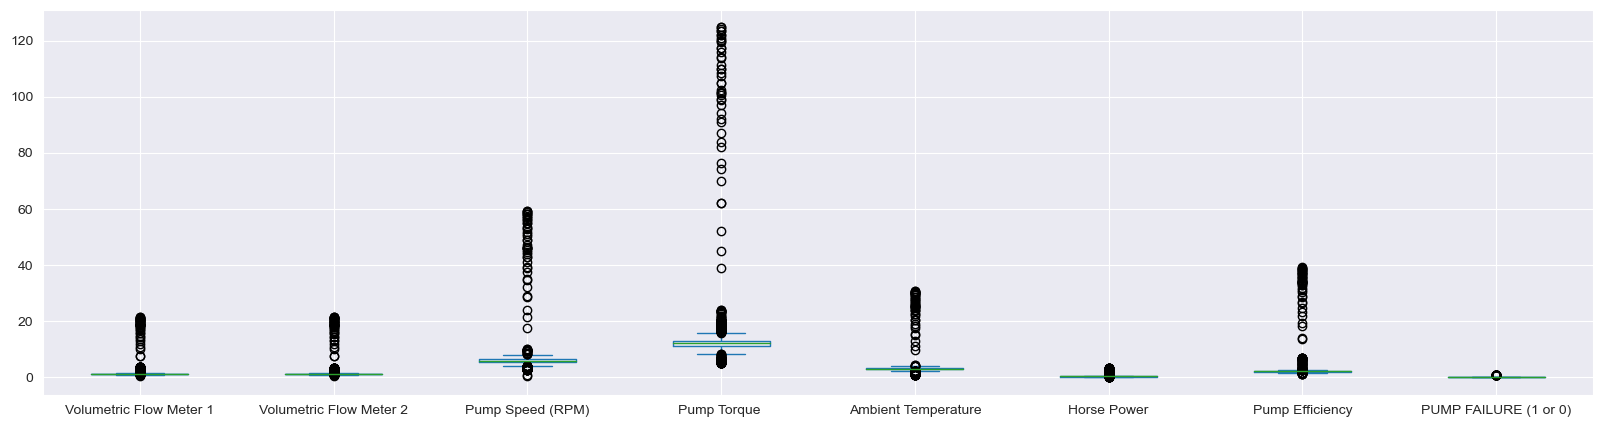

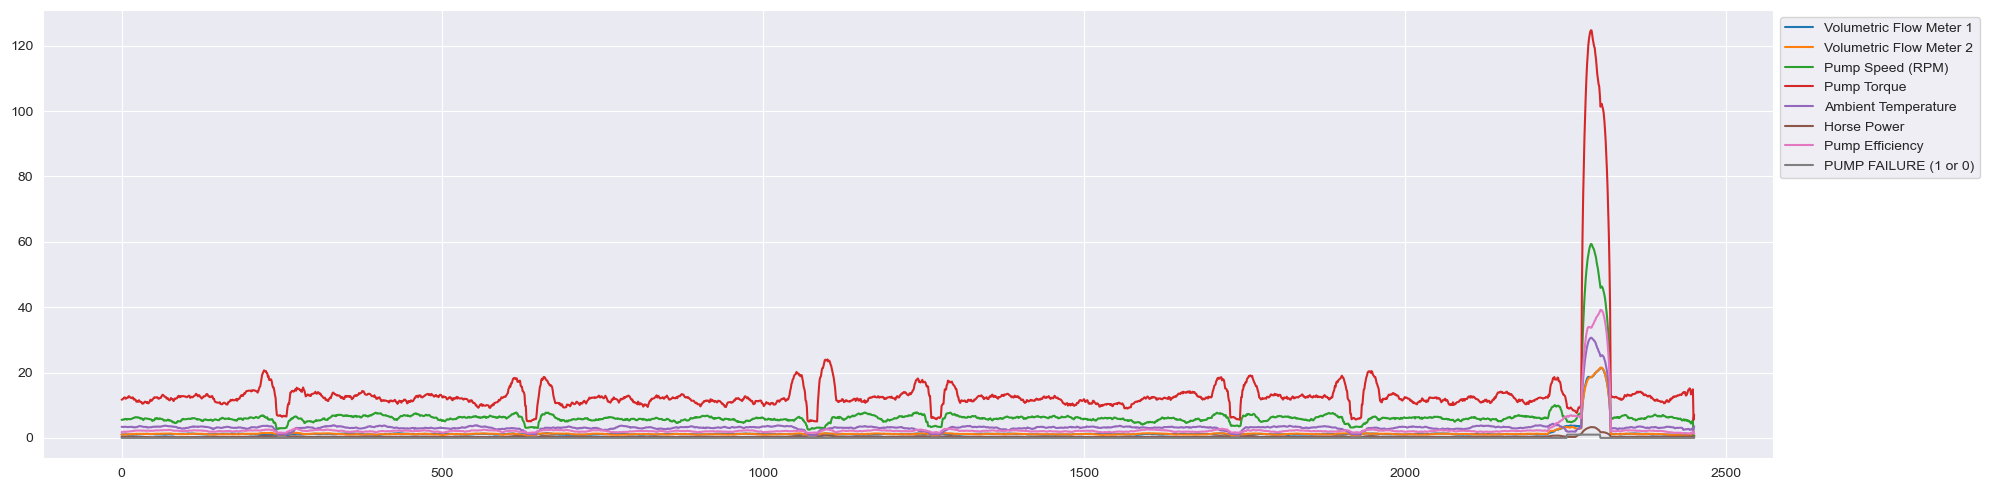

In [10]:
# Plot the std dev data metrics represeted in a box plot to capture outliers
df_std.plot(kind='box')
df_std.plot(kind='line')
plt.legend(loc='upper left', bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

#### The line plot for the raw data denotes several variables showing high ranges of value variability relative to the mean, pump torque and pump speed being the most visibly apparent. Confirmed by the outliers noted in the box plot.
#### The box plot for the std dev data confirms larger variability noticable, as denoted by the many outliers above the upper whisker. Pump speed and Pump Torque showing the highest variablity and largest outlier values. The benefit of the std dev line plot being the noise reduction and ease of distiction for variable contribution to pump failure.

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered DataFrames with Box Plots</span> 


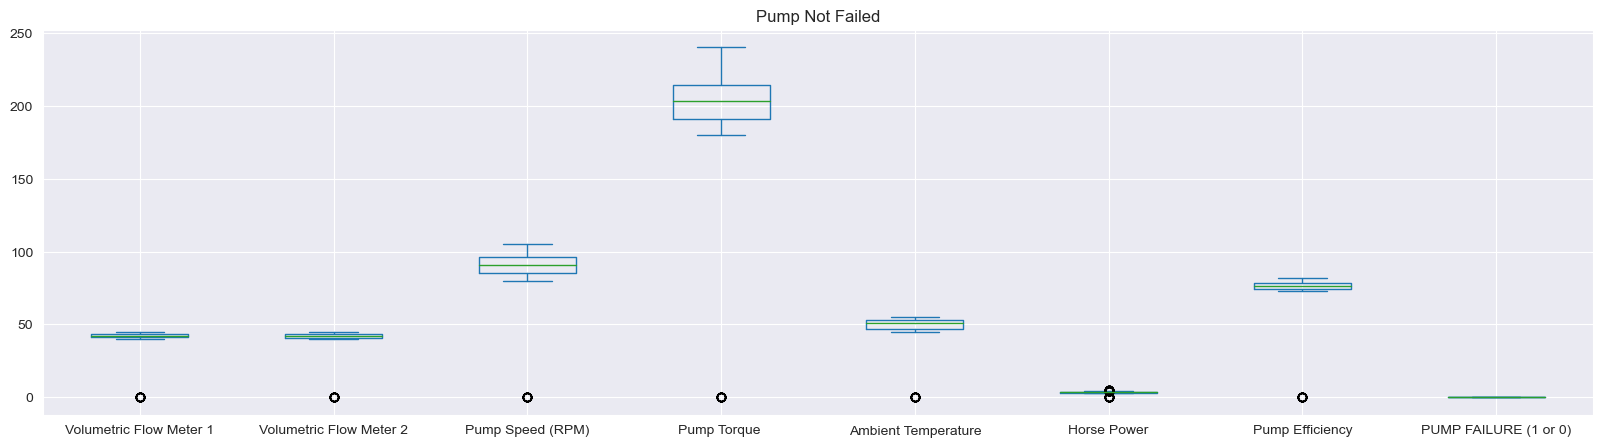

In [11]:
# Diplay the data when the pump has not failed
df_raw_0 = df_raw[df_raw['PUMP FAILURE (1 or 0)'] == 0]
df_raw_0.plot(kind = 'box')
plt.title('Pump Not Failed')
plt.show()

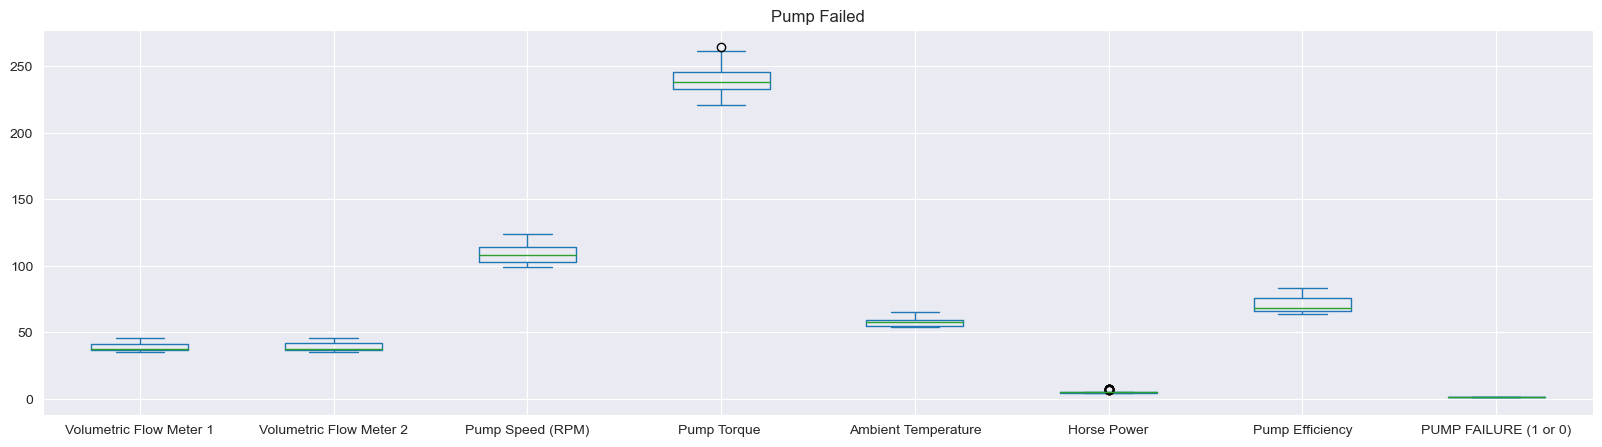

In [12]:
# Diplay the data when the pump has failed
df_raw_1 = df_raw[df_raw['PUMP FAILURE (1 or 0)'] == 1]
df_raw_1.plot(kind = 'box')
plt.title('Pump Failed')
plt.show()

#### When the pump has not failed, the variables show consistent values. Pump torque and speed have the highest IQRs of all the variables.
#### When the pump has failed, the IQRs cluster tightly by outliers are noted. While the IQRs cluster togetehr more tightly, they also increase notably for pump speed and torque.

---------------------------------------------------------------------------

### Step 5: <span style="color:green">Create Quartiles</span> 

In [13]:
Q1 = df_raw.quantile(0.25, numeric_only=True)
Q3 = df_raw.quantile(0.75, numeric_only=True)

In [14]:
Q1

Volumetric Flow Meter 1     41.05
Volumetric Flow Meter 2     41.00
Pump Speed (RPM)            85.00
Pump Torque                191.00
Ambient Temperature         48.00
Horse Power                  3.22
Pump Efficiency             74.56
PUMP FAILURE (1 or 0)        0.00
Name: 0.25, dtype: float64

In [15]:
Q3

Volumetric Flow Meter 1     43.14
Volumetric Flow Meter 2     43.13
Pump Speed (RPM)            97.00
Pump Torque                215.00
Ambient Temperature         53.00
Horse Power                  3.78
Pump Efficiency             78.47
PUMP FAILURE (1 or 0)        0.00
Name: 0.75, dtype: float64

In [16]:
    IQR = Q3 - Q1
IQR

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64

---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

In [19]:
# Identify lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [20]:
# Align the DataFrame and Series objects
aligned_df, lower_limit = df_raw.align(lower_limit, axis=1, copy=False)
aligned_df, upper_limit = df_raw.align(upper_limit, axis=1, copy=False)

# Find the outliers
outliers_mask = ((aligned_df < lower_limit) | (aligned_df > upper_limit)).any(axis=1)
outliers = aligned_df[outliers_mask]

# Calculate percentage of outliers
percentage_outliers = str(round((len(outliers) / len(df_raw)) * 100, 2)) + "%"
percentage_outliers

'3.87%'

#### The significance of removing outliers from the dataset depends on the context of the analysis. For the case of model training, removing outliers could present potentially more accurate for predictions and pattern recognition.
#### However, if the focus of the analysis were to use the outliers for detection of a certain phemenon, in this case pump failure, then we may want to use the outlier observations.

---------------------------------------------------------------------------

### Step 7: <span style="color:green">Create a box plot without outliers</span> 

In [21]:
# Invert the boolean on the outlier mask and assign it as the new condition for removing outliers
no_outliers_mask = ~outliers_mask

# Apply the no-outliers condition to the original data and assign it to a new variable
no_outliers = df_raw[no_outliers_mask]

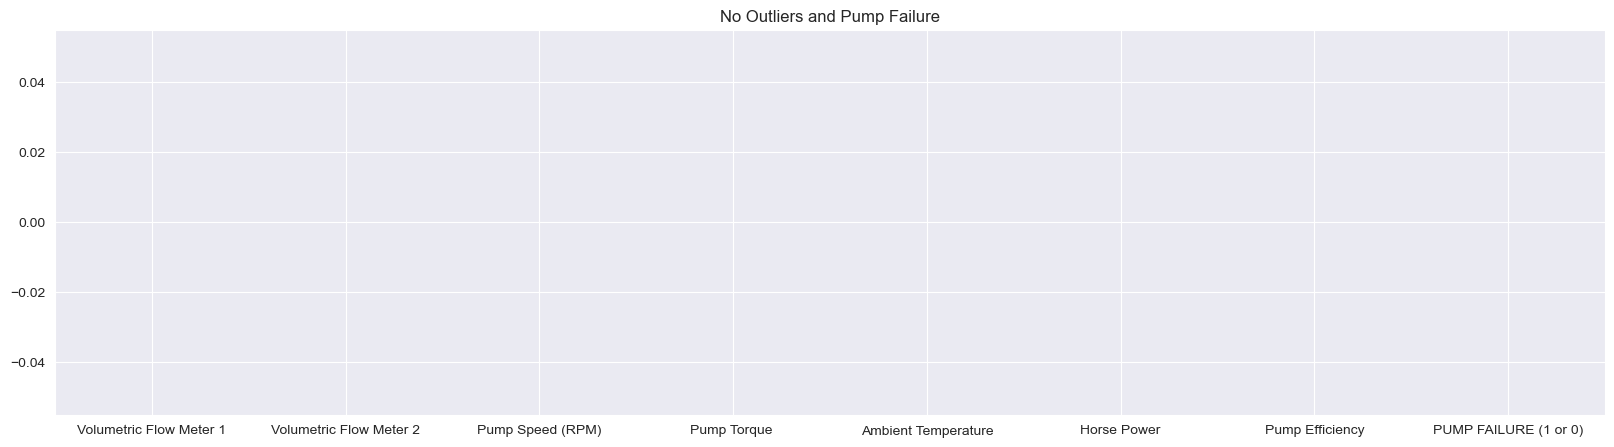

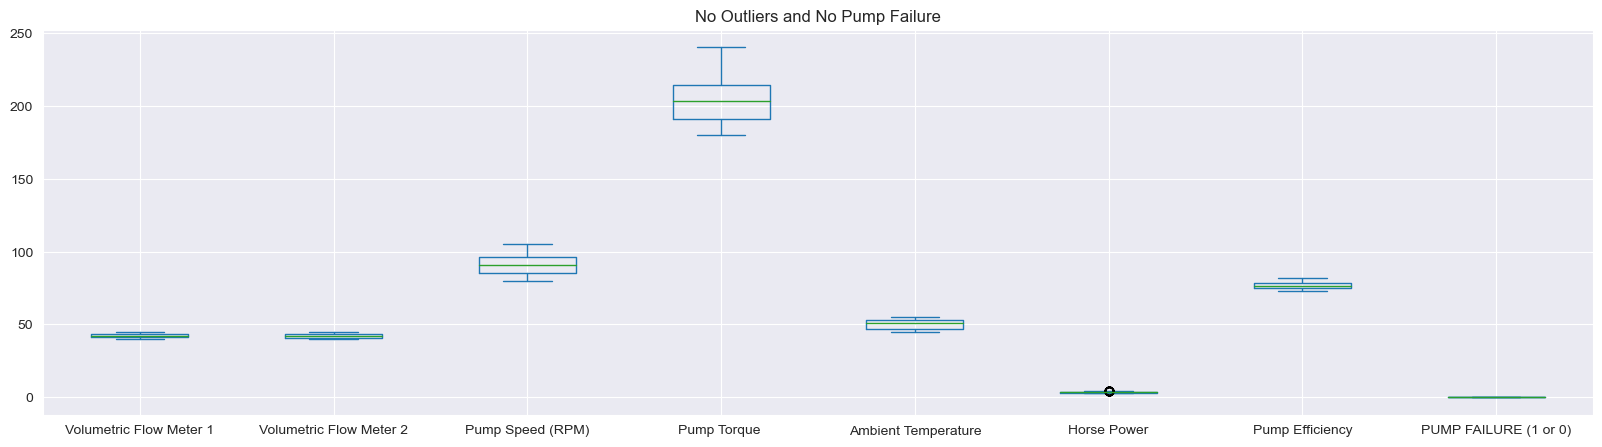

In [22]:
# Show the dataset without outliers when the pump has failed
no_outliers_1 = no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 1]

# Show the dataset without outliers when the pump has not failed
no_outliers_0 = no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 0]

# Plot the data with and without the presence of pump failure with the outliers removed
no_outliers_1.plot(kind='box')
plt.title('No Outliers and Pump Failure')
no_outliers_0.plot(kind='box')
plt.title('No Outliers and No Pump Failure')
plt.show()

#### The lack of data present to visualize the outliers during pump failure is to be expected. This is because the presence of outliers are indicative of pump failure, therefor if we remove the presence of outliers then there will be no data present during pump failure.

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 

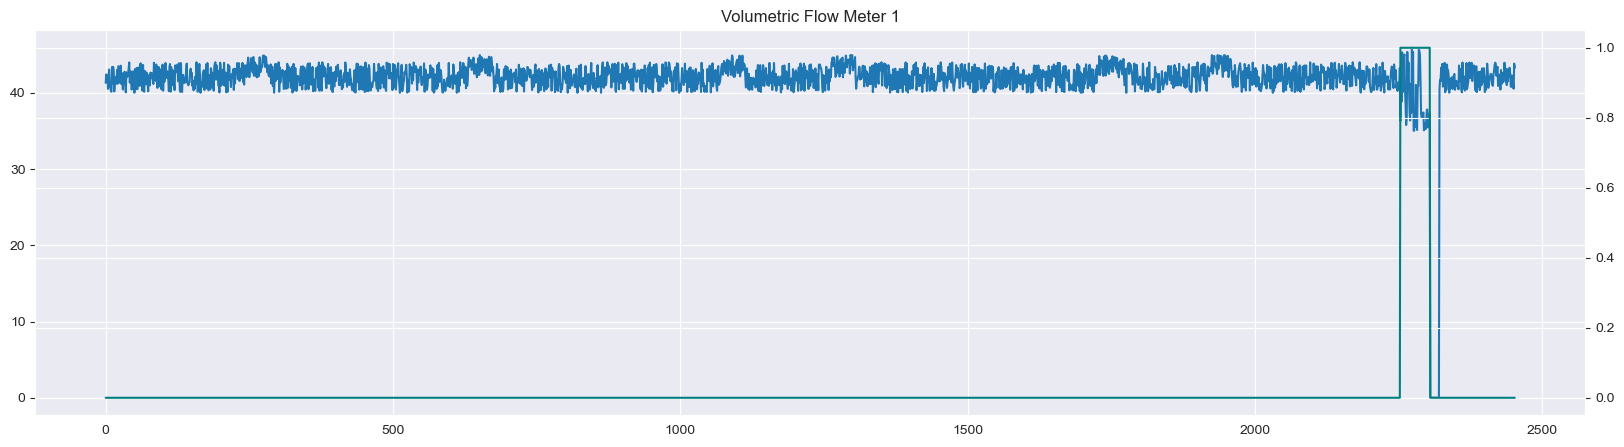

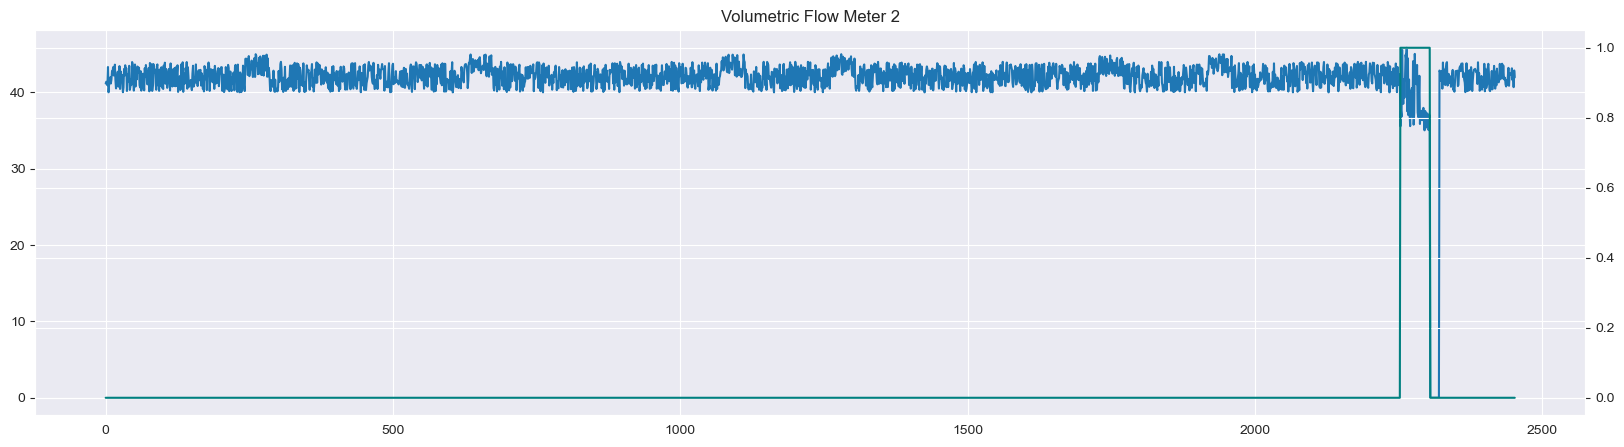

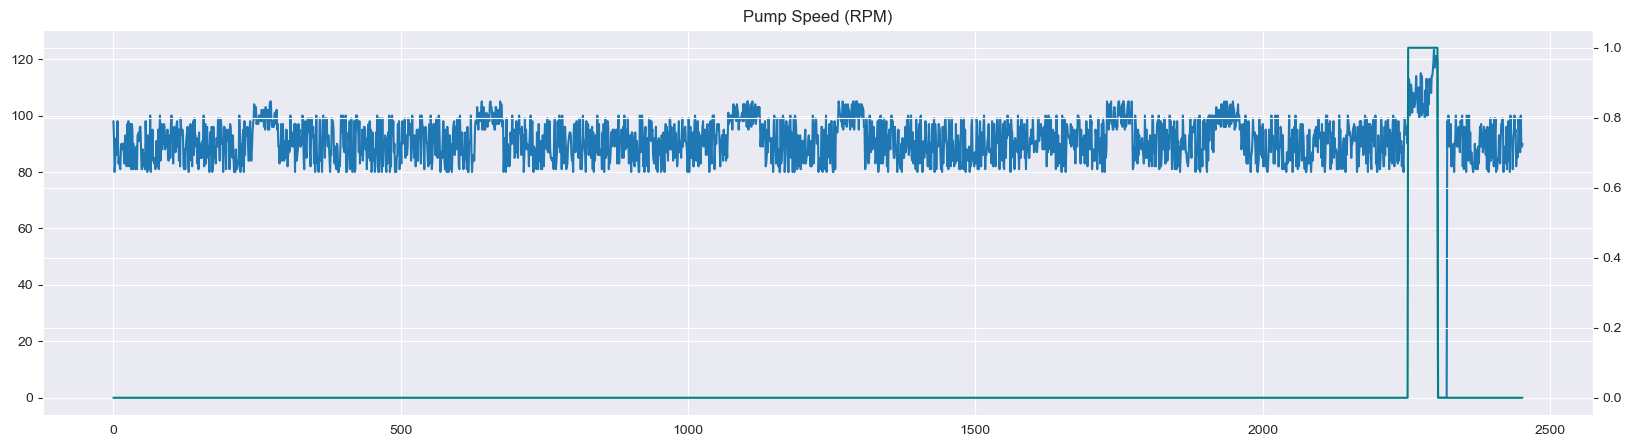

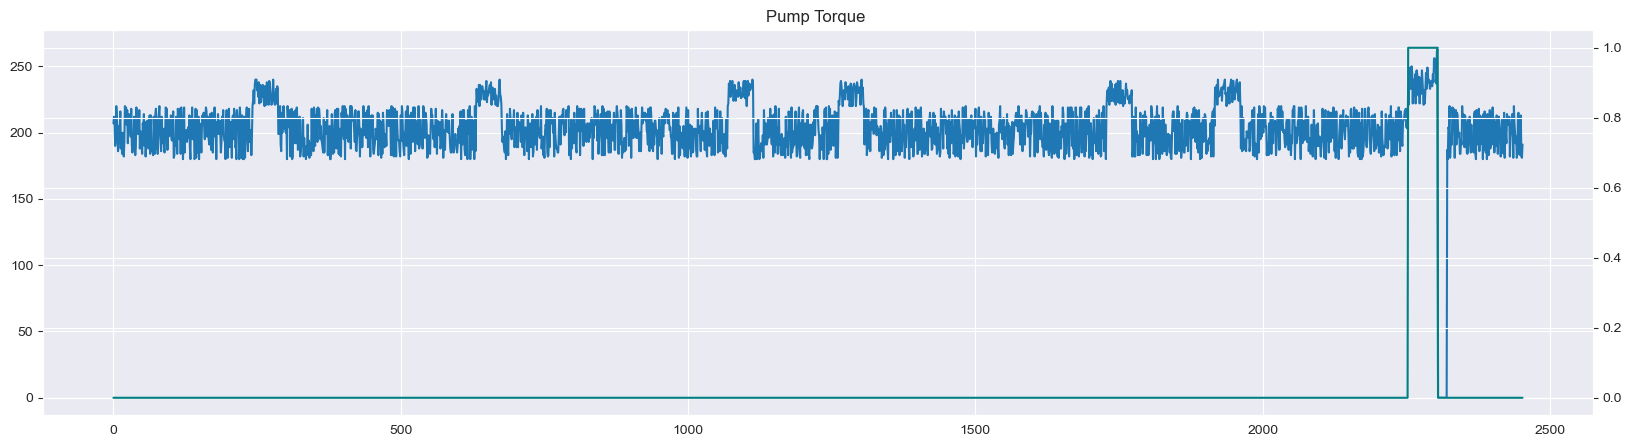

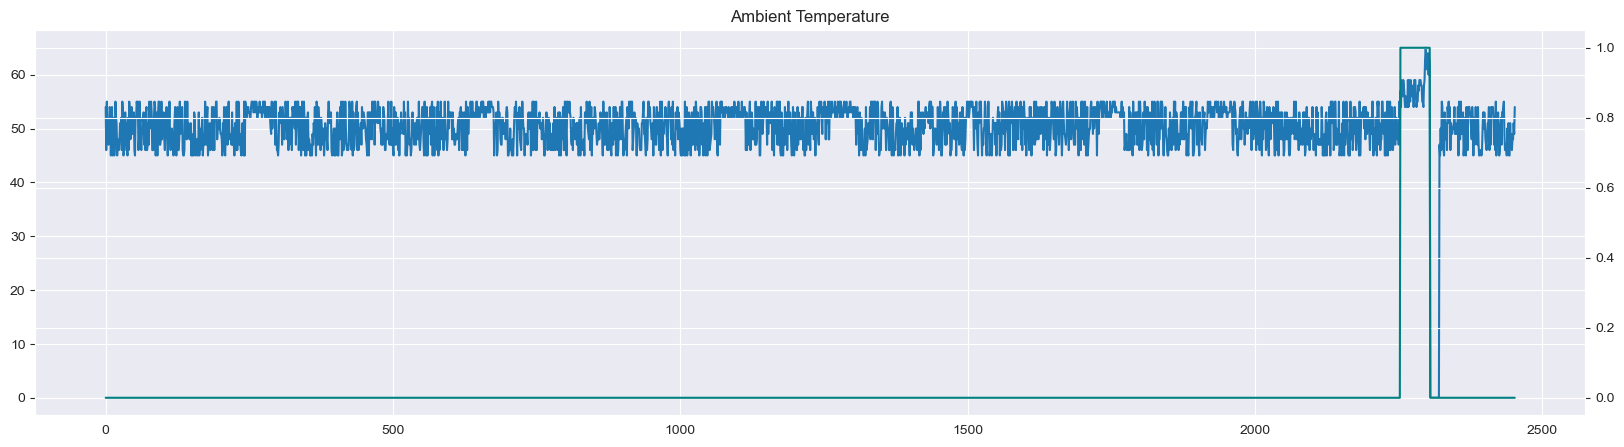

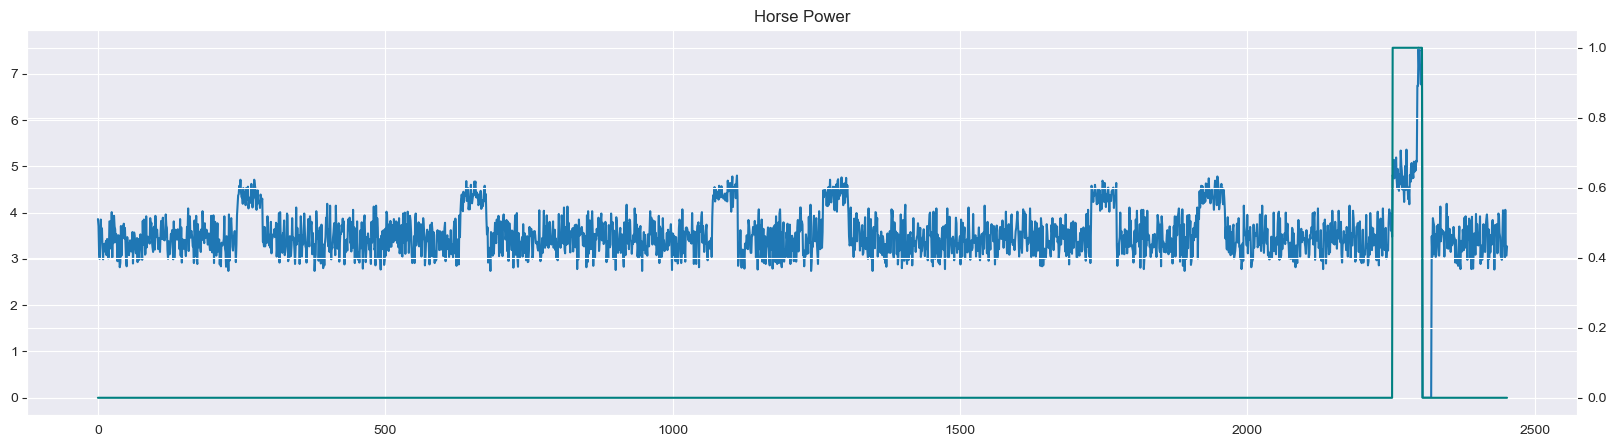

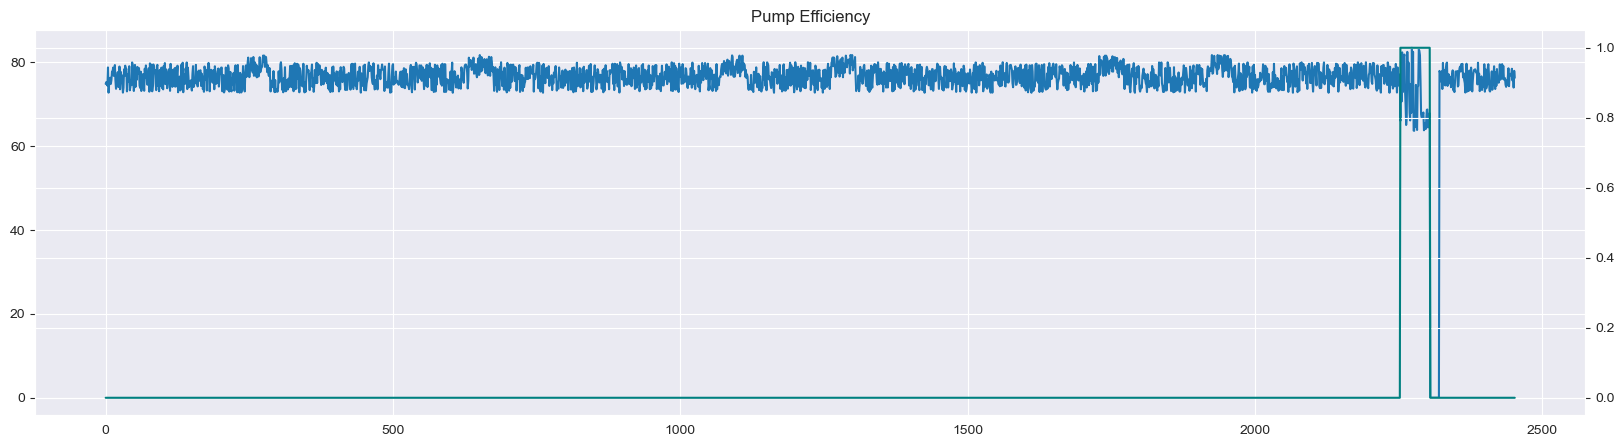

In [23]:
# Get only numeric columns from the dataframe
numeric_columns = list(df_raw.select_dtypes(include=[np.number]).columns)

# Drop the redundant pump failure chart
del numeric_columns[-1]

# Loop the mapping and plotting of the column for each column name in the list
for item in numeric_columns:
    axis_1 = df_raw[item].plot(kind='line')
    axis_2 = axis_1.twinx()
    plt.title(item)
    axis_2.plot(df_raw["PUMP FAILURE (1 or 0)"], color = 'teal')
    plt.show()

#### Viewing each variable plotted individually makes it easier to see higher variability of some variables during pump failure. For example, Horse Power and Pump Torque both display relatively higher levels of variablity furing pump failure.

<h3>  <span style="color:green">This is where we will switch to using the dataframe_stdev that was had previously defined in Q1, dataframe_stdev </span> </h3>

---

### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

In [33]:
# Set the TIMEFRAME attribute as the index
dated_std = df_std.set_index('TIMEFRAME (DD/MM/YYYY)')

In [25]:
# Filter the data to the time period of interest
std_time_filtered = dated_std[(dated_std.index >= '10/12/2014 12:00') & (dated_std.index <= '10/12/2014 14:30')]

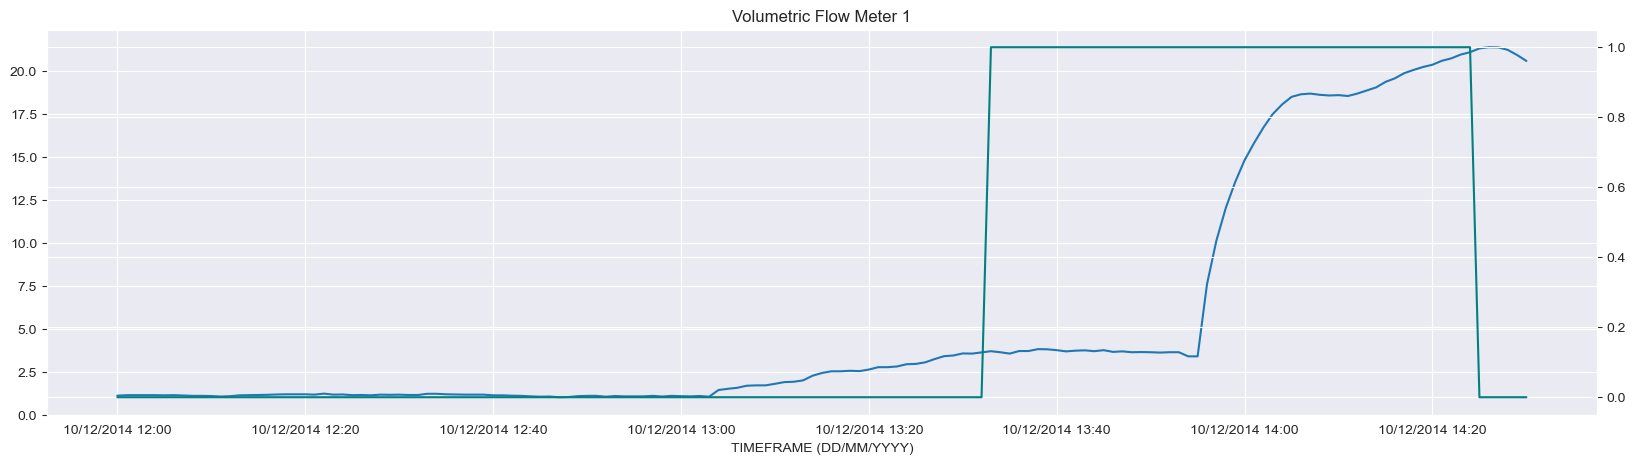

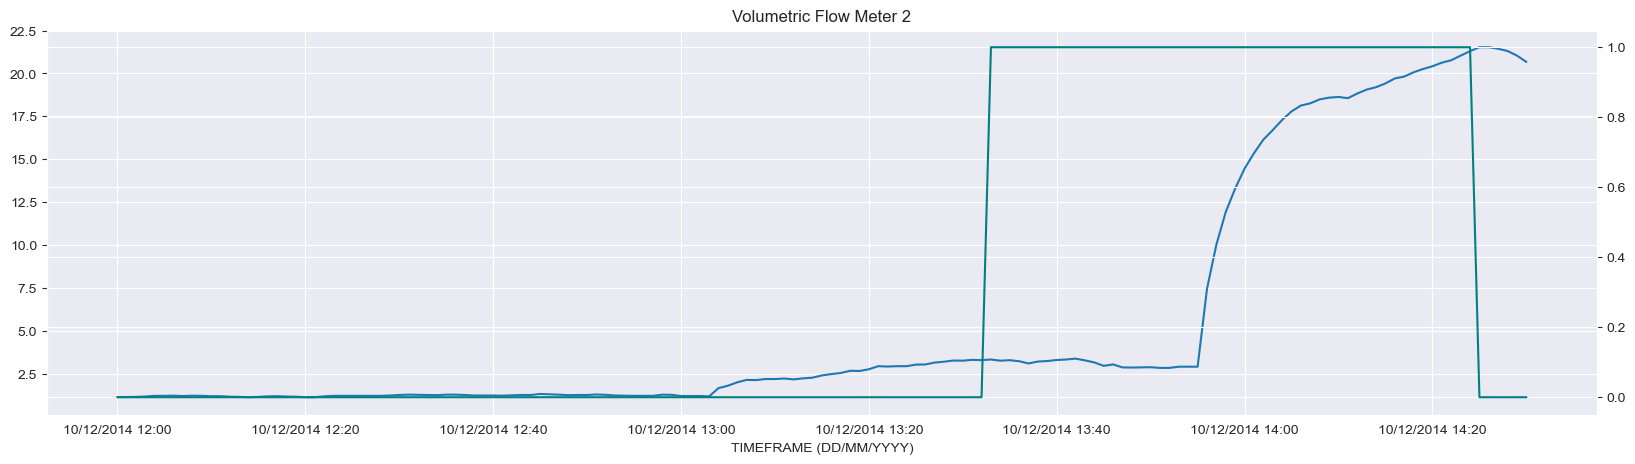

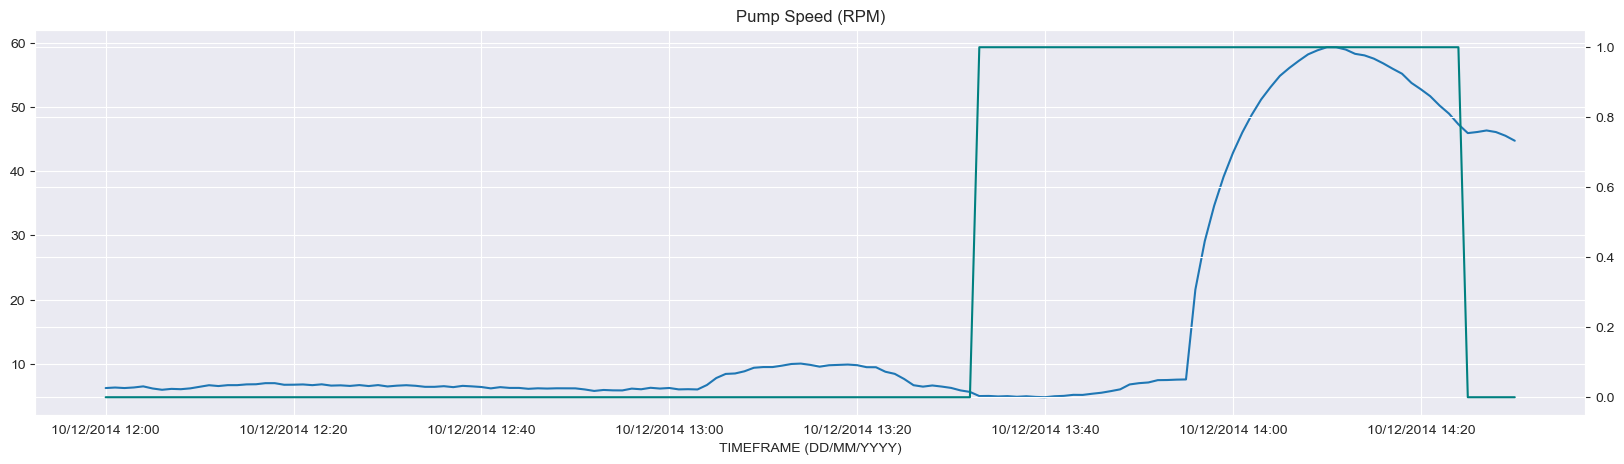

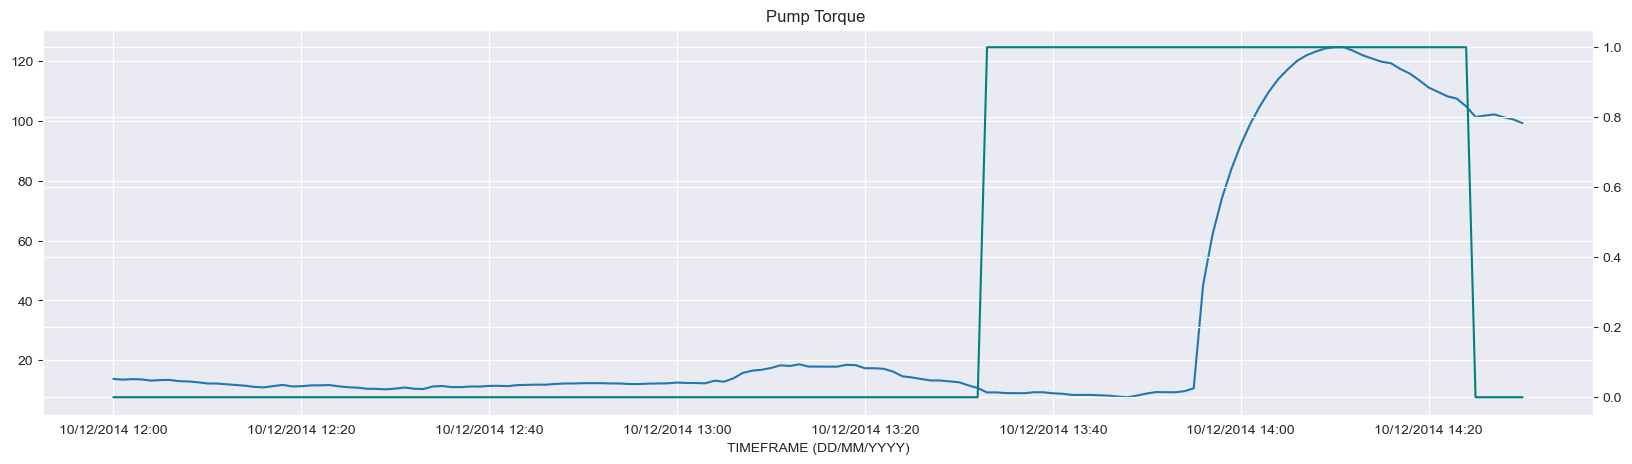

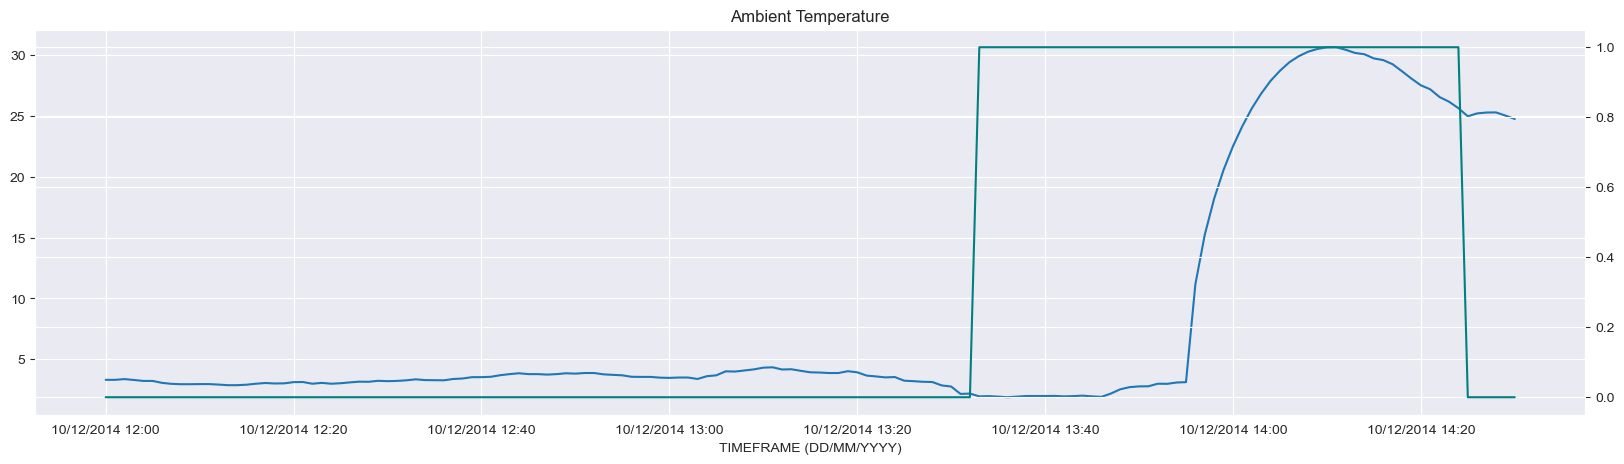

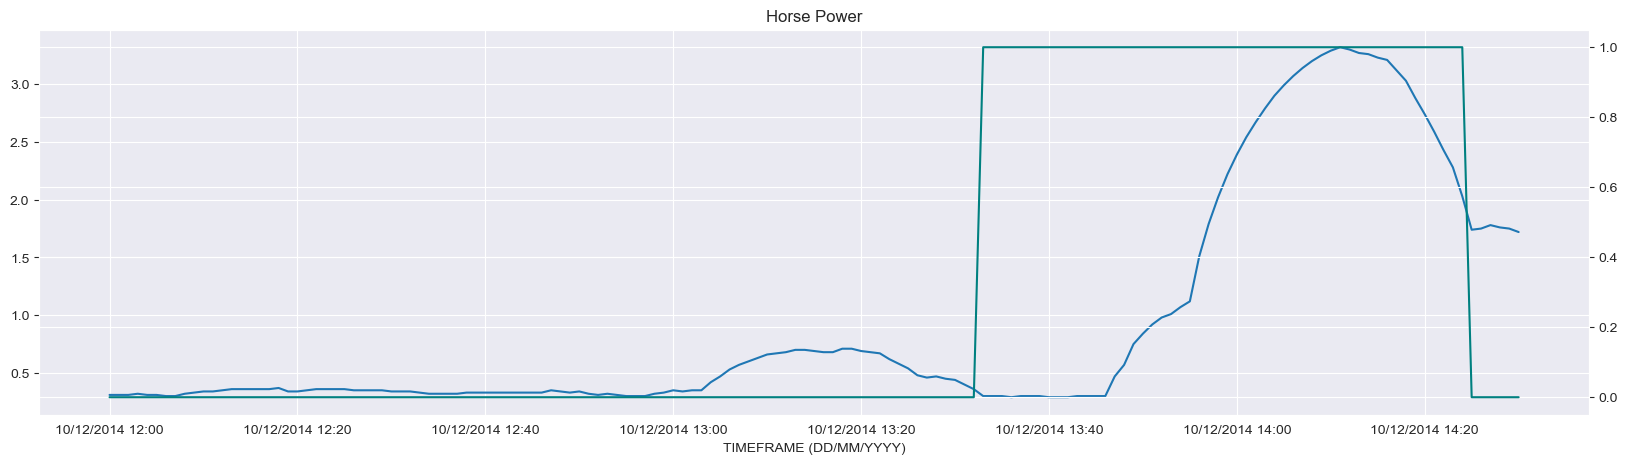

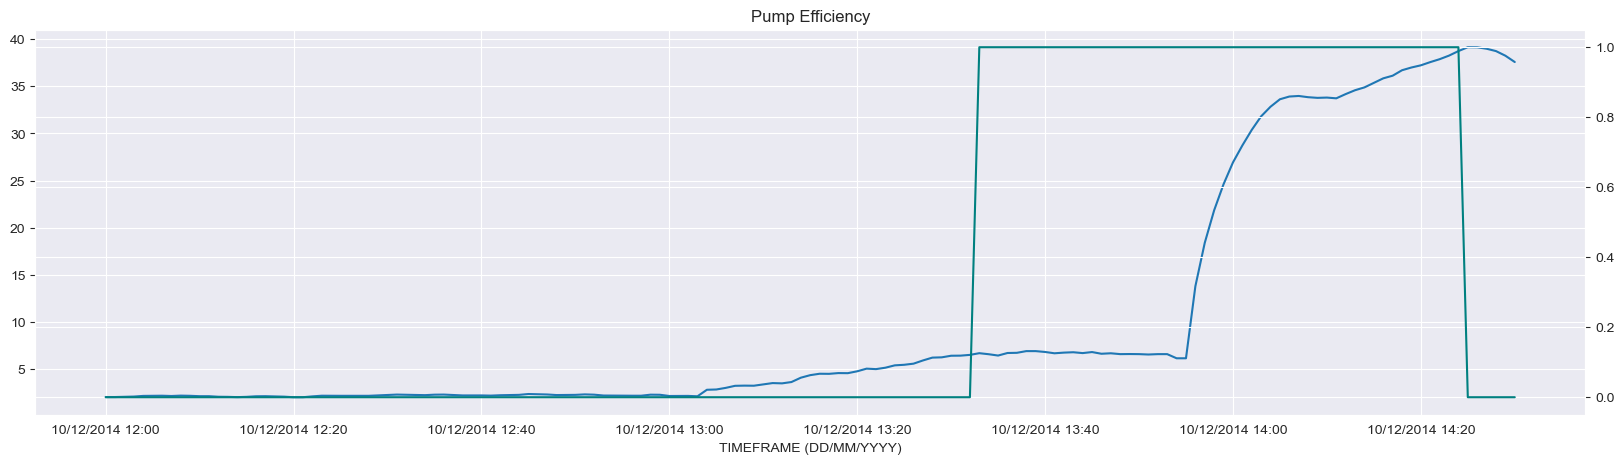

In [26]:
# Loop the mapping and plotting of the column for each column name in the list
for item in numeric_columns:
    axis_1 = std_time_filtered[item].plot(kind='line')
    axis_2 = axis_1.twinx()
    plt.title(item)
    axis_2.plot(std_time_filtered["PUMP FAILURE (1 or 0)"], color = 'teal')
    plt.show()

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

### Step 9: <span style="color:purple">Create a Correaltion Heatmap</span> 

#### <b>DISCALIMER:</b> We previously determined the data to <b> not be normally distributed </b> , therefor a <b>Spearman's correlation value may be more appropriate</b> moving forward.
#### However, for the purposes of this exercise we will be proceeding with Pearson's correlation values for our correlation matrix and modeling.

In [27]:
# Initiate the correlation matrix as variable
corr_matrix = df_raw.corr(method = 'pearson', numeric_only = True)

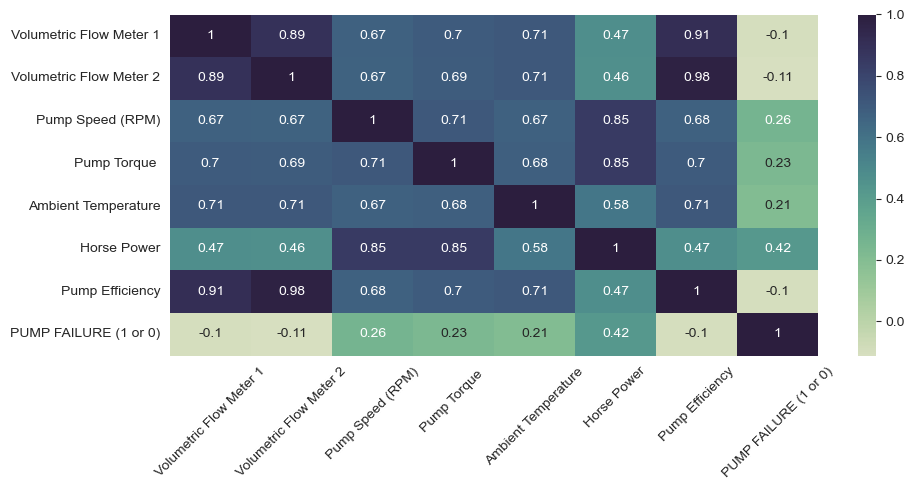

In [28]:
plt.figure(figsize=(10,5))
cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
sns.heatmap(corr_matrix, annot = True, cmap = cmap)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#### When we observe the correlation matrix in the form of a heatmap, we can see that <b>Horse Power (0.42)</b> and <b>Pump Speed (0.26)</b> have the highest correlation values to PUMP FAILURE.


### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
#### We want to plot the correlation values in a bar chart to visualize the strength of each attribute's relationship to pump failure

In [29]:
# Obersve the correlation matrix
corr_matrix

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
Volumetric Flow Meter 1,1.000000,0.893058,0.674691,0.700425,0.713913,0.470081,0.913014,-0.102508
Volumetric Flow Meter 2,0.893058,1.000000,0.671896,0.692183,0.710423,0.462087,0.980144,-0.112115
Pump Speed (RPM),0.674691,0.671896,1.000000,0.711037,0.674645,0.848416,0.677924,0.260016
Pump Torque,0.700425,0.692183,0.711037,1.000000,0.680159,0.847884,0.698527,0.233193
Ambient Temperature,0.713913,0.710423,0.674645,0.680159,1.000000,0.579374,0.712727,0.207946
Horse Power,0.470081,0.462087,0.848416,0.847884,0.579374,1.000000,0.471731,0.421694
Pump Efficiency,0.913014,0.980144,0.677924,0.698527,0.712727,0.471731,1.000000,-0.102696
PUMP FAILURE (1 or 0),-0.102508,-0.112115,0.260016,0.233193,0.207946,0.421694,-0.102696,1.000000


In [30]:
# Sort the corr matrix value sfor the PUMP FAILURE column
sorted_corr = corr_matrix['PUMP FAILURE (1 or 0)'].sort_values(ascending = False)

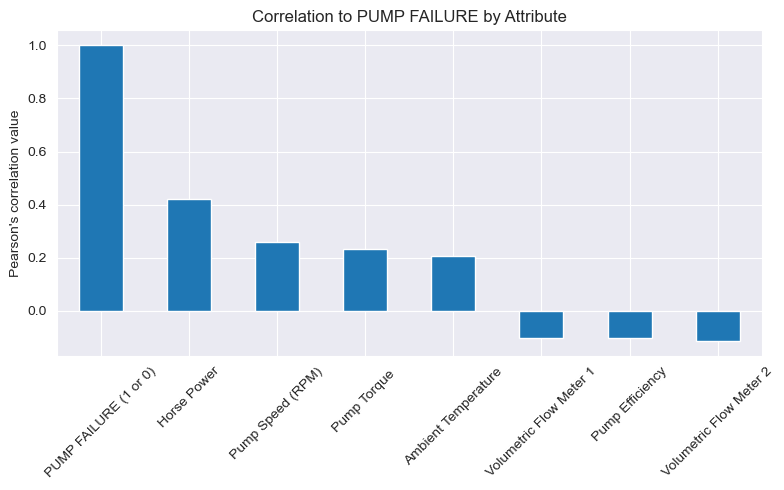

In [31]:
# Plot the correlation values for PUMP FAILURE by attribute
plt.figure(figsize = (8,5))
sorted_corr.plot(kind = 'bar')
plt.title('Correlation to PUMP FAILURE by Attribute')
plt.ylabel("Pearson's correlation value")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 

In [32]:
# Initiate the corr matrix for std dev dataset
corr_matrix_std = df_std.corr( numeric_only = True)

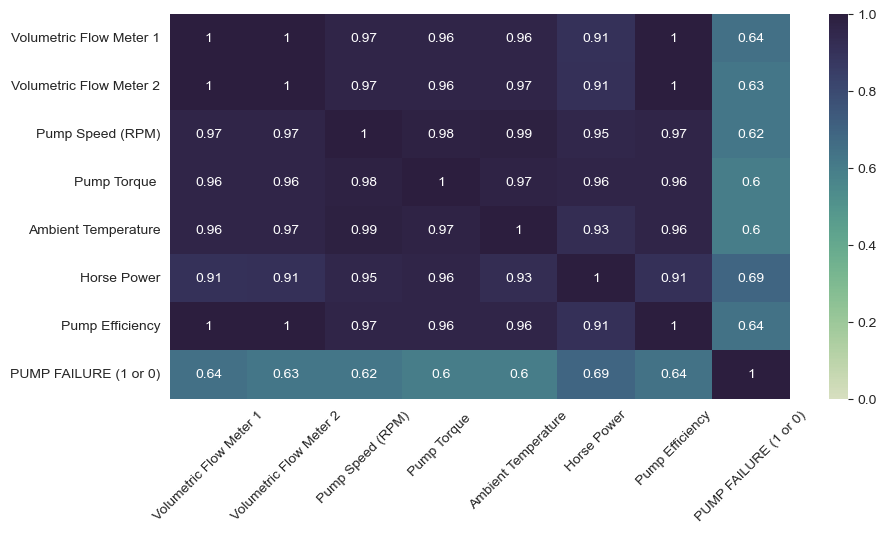

In [33]:
#Plot the correlation
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix_std, annot = True, cmap = cmap, vmin= 0)
plt.xticks(rotation = 45)
plt.show()

#### Observing the correlation values for pump failure by each attribute in the std dev dataset, we an see that <b> Horse Power(0.69), Pump Efficiency (0.64) </b> and <b> Volumetric Flow Meter 1 (0.64)</b> have the highest correlation to pump failure.

---------------------------------------------------------------------------

### Step 13: <span style="color:purple">Create and Use OLS Regression</span> 

### For the raw dataset:

In [3]:
#Drop non-numeric columns for the model
non_numeric_raw = df_raw.select_dtypes(exclude=['int64', 'float64']).columns

df_raw_numeric = df_raw.drop(columns=non_numeric_raw)

In [4]:
# Drop the dependent variable column to get only independent variables
raw_ind_var = df_raw_numeric.drop('PUMP FAILURE (1 or 0)', axis=1,)

# Set the independent and dependent(PUMP FAILURE) variables
raw_X = sm.add_constant(raw_ind_var)
raw_Y = df_raw_numeric['PUMP FAILURE (1 or 0)']

In [5]:
# Store and fit the model
raw_reg_model = sm.OLS(raw_Y,raw_X).fit() 

In [6]:
# Print model summary
print(raw_reg_model.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Thu, 07 Sep 2023   Prob (F-statistic):          5.58e-233
Time:                           13:21:13   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### For the std dev dataset:

In [7]:
#Drop non-numeric columns for the model
non_numeric_std = df_std.select_dtypes(exclude=['int64', 'float64']).columns

df_std_numeric = df_std.drop(columns=non_numeric_std)

In [8]:
# Drop the dependent variable column to get only independent variables
std_ind_var = df_std_numeric.drop('PUMP FAILURE (1 or 0)', axis=1,)

#Dataframe_Stdev
std_X = sm.add_constant(std_ind_var)
std_Y = df_std_numeric['PUMP FAILURE (1 or 0)']

In [9]:
# Store and fit the model
std_reg_model = sm.OLS(std_Y,std_X).fit() 

In [10]:
# Print the model summary
print(std_reg_model.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Thu, 07 Sep 2023   Prob (F-statistic):               0.00
Time:                           13:21:17   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

#### From a performance standpoint, <b>the model built on the standard deviation (std) data seems to be a better representation</b>, with a <b> higher R-squared</b>, a <b> more substantial F-statistic</b>, and overall better predictive capability (as indicated by <b> AIC and BIC</b>). 
#### We may use the raw data in the instance that we want to retain interpretability in original units, however.
#### For the purposes of determining pump failure, given the significant difference in R-squared values, the <b>Std Data model is likely more appropriate</b>.

### Step 14: <span style="color:purple">Analysis of Coefficients </span>

Great job creating those regressive equations! You've reached the final two steps of this case study!

You've identified that *one* regressive model has a better fit than the previous model.

Using this model, we want to **extract** the co-efficients to better understand the variables that display the largest *absolute* rate of change with respect to Pump Failure. We'll use the co-efficients to better assess this from an *absolute* rate of change perspective. (i.e. Which variables spike the most in relation to Pump Failure?)

<b> i) Using the .params method, extract the Coefficients from your regression_model and create a bar plot that identifies which coefficients react most strongly with respect to Pump Failure. Which three (3) variables seem to showcase the
strongest 'relationship' with respect to Pump Failure? </b>

You can use params via the following syntax:

    model.params where model represents the name of the regression model you've created.

We've included an example below that showcases what your chart should look like upon completion of this exercise. 



In [11]:
std_coeff = std_reg_model.params.sort_values(ascending = False)

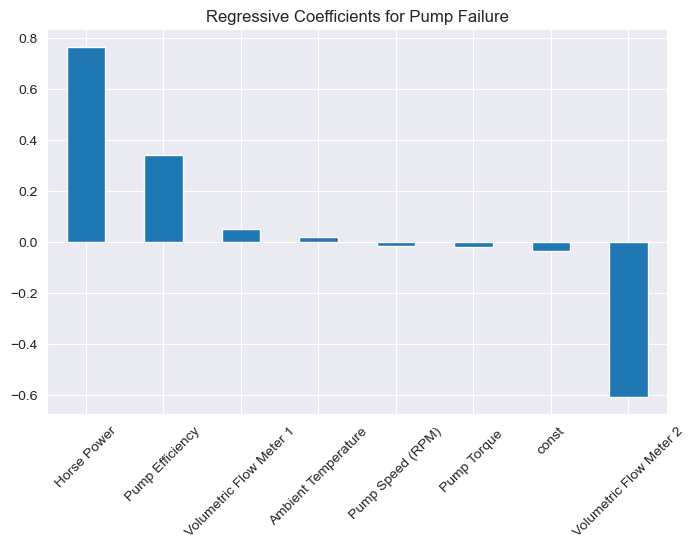

In [12]:
plt.figure(figsize = (8,5))
std_coeff.plot(kind='bar')
plt.title('Regressive Coefficients for Pump Failure')
plt.xticks(rotation=45)
plt.show()

#### Visualizing the regressive coefficients allows us to observe <b> Horse Power, Pump Efficiency,</b> and <b> Volumetric Flow Meter 1 </b> as the top 3 highest-correlated attributes to PUMP FAILURE. 


### Step 15: <span style="color:purple">Validate Predictions</span> 

Now it's time for us to <b> validate our predictions. </b>
    
Once you've created a regressive_model, you can call this using the following syntax:

        regressive_model.predict(independent_variables). 
        
Extra information regarding how this works can be found <a href = https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html> here </a>

<b> 
i) Create a new column in the dataframe_stdev, called, 'Prediction'. 
    
ii) Use the regression equation you created in the previous step and apply the .predict() function to the independent variables in the dataframe_stdev dataset so you get a column full of your regressive predictions.
    
iii) Create a Dual-Axis Plot with the following axes items: <p>
    
        Axes One would contain: Volumetric Flow Meter 2, Pump Efficiency and Horse Power 
        Axes two would contain: Pump Failure (1 or 0) and Prediction
</b>


**Note:** Don't forget how to use .twinx() to help you out with the dual axis!

We've included an example below of how your chart might look once you're done!

In [13]:
df_std['Predictions'] = std_reg_model.predict(std_X)

In [34]:
df_std.set_index('TIMEFRAME (DD/MM/YYYY)', inplace=True)

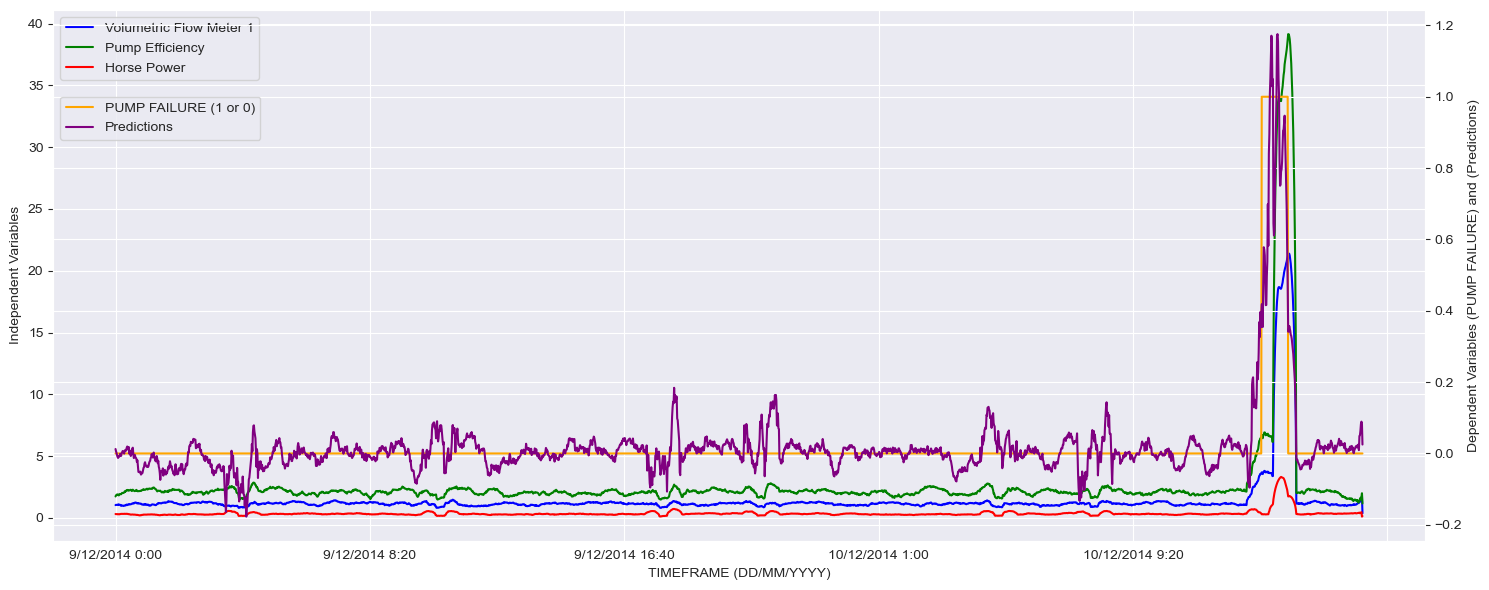

In [42]:
# Create a figure and a set of subplots
fig, axis_1 = plt.subplots(figsize=(15, 6))

# Step 1: Plotting columns on the primary y-axis
df_std['Volumetric Flow Meter 1'].plot(ax=axis_1, label='Volumetric Flow Meter 1', color='blue')
df_std['Pump Efficiency'].plot(ax=axis_1, label='Pump Efficiency', color='green')
df_std['Horse Power'].plot(ax=axis_1, label='Horse Power', color='red')

# Step 2: Plotting columns on the secondary y-axis
axis_2 = axis_1.twinx()  # instantiate a second axes that shares the same x-axis
df_std['PUMP FAILURE (1 or 0)'].plot(ax=axis_2, label='PUMP FAILURE (1 or 0)', color='orange', )
df_std['Predictions'].plot(ax=axis_2, label='Predictions', color='purple')

# Set the labels for y-axes
axis_1.set_ylabel('Independent Variables')
axis_2.set_ylabel('Dependent Variables (PUMP FAILURE) and (Predictions)')

# Handle the legends
axis_1.legend(loc='upper left', bbox_to_anchor=(0, 1))   
axis_2.legend(loc='upper left', bbox_to_anchor=(0, 0.85))  

plt.tight_layout()
plt.show()

In summary, we achieved:

<li> Create Line Plots and Box Plots </li>
<li> Understand Descriptive Statistics from the .describe() functions </li>
<li> Detect and Remove Outliers from your Dataset </li>
<li> Subset and Filter your DataFrames </li>
<li> Use For Loops to smartly loop through data </li>
<li> Use Dual Axes to Plot Multiple Variables on different axes </li>
<li> Interpret Correlation Coefficients and Heatmaps </li>
<li> Create and assess the goodness of fit for your Linear Regression Models </li>